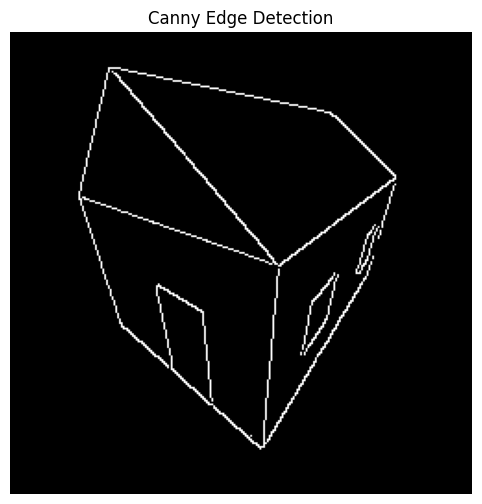

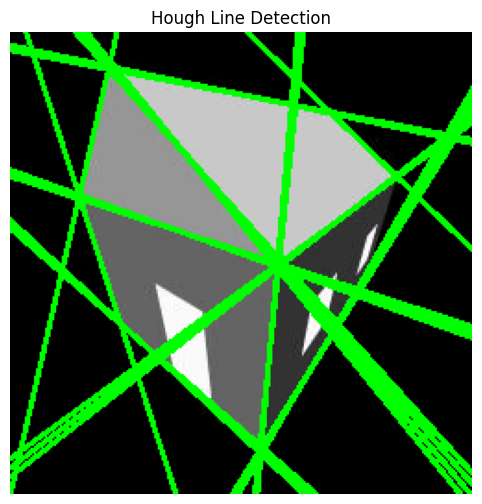

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the input image
image = cv2.imread('data/left.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Canny Edge Detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Display the edges detected by Canny
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# Step 3: Apply the Hough Line Transform
# Arguments:
#dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
#lines: A vector that will store the parameters (r,θ) of the detected lines
#rho : The resolution of the parameter r in pixels. We use 1 pixel.
#theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
#threshold: The minimum number of intersections to "*detect*" a line
#srn and stn: Default parameters to zero. Check OpenCV reference for more info.
lines = cv2.HoughLines(edges, 1, np.pi / 180, 50, None, 0, 0)

# Step 4: Draw the lines on the original image
# Create a copy of the original image to draw lines
output_image = image.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        # Draw the line on the output image
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the output image with detected lines
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')
plt.show()
